# **Identify data types and relevant variables using Python**

# Build dataframe

In [1]:
#Import relevant Python libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Data exploration

In [2]:
#Read CSV file
df = pd.read_csv('2025-10.csv', encoding='utf-8')

In [6]:
#Know the form of the DateFrame
df.shape

(1754353, 9)

In [3]:
#Find null or missing values
df.isna().sum()

Genero_Usuario            2
Edad_Usuario             82
Bici                      0
Ciclo_Estacion_Retiro     0
Fecha_Retiro              0
Hora_Retiro               0
Ciclo_EstacionArribo      0
Fecha_Arribo              0
Hora_Arribo               0
dtype: int64

In [4]:
#Erase null values
df = df.dropna()

In [5]:
#find duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
#Validate changes
df.isna().sum()

Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_EstacionArribo     0
Fecha_Arribo             0
Hora_Arribo              0
dtype: int64

In [7]:
#Convert columns to appropriate data types
df['Fecha_Retiro'] = pd.to_datetime(df['Fecha_Retiro'], format='%d/%m/%Y')
df['Fecha_Arribo'] = pd.to_datetime(df['Fecha_Arribo'], format='%d/%m/%Y')

In [8]:
#Create new columns for start and end datetime of the trip
df['Fecha_Hora_Inicio'] = pd.to_datetime(df['Fecha_Retiro'].astype(str) + ' ' + df['Hora_Retiro'].astype(str))
df['Fecha_Hora_Fin'] = pd.to_datetime(df['Fecha_Arribo'].astype(str) + ' ' + df['Hora_Arribo'].astype(str))

In [9]:
#Create column for trip duration in minutes
df['Duracion_Viaje'] = (df['Fecha_Hora_Fin'] - df['Fecha_Hora_Inicio']).dt.total_seconds() / 60

In [10]:
# Display and examine the first 5 rows of the dataframe
df.head(5)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Fecha_Hora_Inicio,Fecha_Hora_Fin,Duracion_Viaje
0,M,25.0,2250793,412,2025-09-30,23:49:04,372,2025-10-01,00:00:04,2025-09-30 23:49:04,2025-10-01 00:00:04,11.000000
1,F,64.0,8309759,486,2025-09-30,23:50:32,543,2025-10-01,00:00:07,2025-09-30 23:50:32,2025-10-01 00:00:07,9.583333
2,F,25.0,5941455,043,2025-09-30,23:54:01,114,2025-10-01,00:00:09,2025-09-30 23:54:01,2025-10-01 00:00:09,6.133333
3,M,28.0,5233655,563,2025-09-30,23:42:04,543,2025-10-01,00:00:11,2025-09-30 23:42:04,2025-10-01 00:00:11,18.116667
4,M,22.0,4988028,028,2025-09-30,23:43:02,481,2025-10-01,00:00:12,2025-09-30 23:43:02,2025-10-01 00:00:12,17.166667


In [12]:
# Save cleaned DataFrame to a new CSV file
df.to_csv('df_cleaned_2025-10.csv', index=False, encoding='utf-8')

In [20]:
# Get summary statistics
df.describe()

,Edad_Usuario,Bici,Fecha_Retiro,Fecha_Arribo,Fecha_Hora_Inicio,Fecha_Hora_Fin,Duracion_Viaje
count,1.754271e+06,1.754271e+06,1754271,1754271,1754271,1754271,1.754271e+06
mean,3.433349e+01,5.457177e+06,2025-10-16 12:26:14.980376832,2025-10-16 12:30:29.510720,2025-10-17 02:53:19.493326848,2025-10-17 03:09:01.723911680,1.570384e+01
min,1.600000e+01,2.000461e+06,2025-07-08 00:00:00,2025-10-01 00:00:00,2025-07-08 15:19:09,2025-10-01 00:00:04,3.166667e-01
25%,2.700000e+01,3.732146e+06,2025-10-09 00:00:00,2025-10-09 00:00:00,2025-10-09 11:05:32.500000,2025-10-09 11:19:33,7.216667e+00
50%,3.200000e+01,5.452651e+06,2025-10-17 00:00:00,2025-10-17 00:00:00,2025-10-17 07:23:06,2025-10-17 07:36:55,1.210000e+01
75%,3.900000e+01,7.195712e+06,2025-10-24 00:00:00,2025-10-24 00:00:00,2025-10-24 17:58:46.500000,2025-10-24 18:14:42,2.025000e+01
max,1.250000e+02,8.999708e+06,2025-10-31 00:00:00,2025-10-31 00:00:00,2025-10-31 23:56:53,2025-10-31 23:59:59,1.385588e+05
std,9.795119e+00,2.023217e+06,NaN,NaN,NaN,NaN,1.475084e+02


In [22]:
# Get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1754271 entries, 0 to 1754352
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Genero_Usuario         object        
 1   Edad_Usuario           float64       
 2   Bici                   int64         
 3   Ciclo_Estacion_Retiro  object        
 4   Fecha_Retiro           datetime64[ns]
 5   Hora_Retiro            object        
 6   Ciclo_EstacionArribo   object        
 7   Fecha_Arribo           datetime64[ns]
 8   Hora_Arribo            object        
 9   Fecha_Hora_Inicio      datetime64[ns]
 10  Fecha_Hora_Fin         datetime64[ns]
 11  Duracion_Viaje         float64       
dtypes: datetime64[ns](4), float64(2), int64(1), object(5)
memory usage: 174.0+ MB


# Understand the data - Investigate the variables

In [ ]:
# Count occurrences of each age in 'Edad_Usuario'
df['Edad_Usuario'].value_counts()

Edad_Usuario
30.0     89377
29.0     86928
28.0     86844
32.0     85661
31.0     85387
         ...  
85.0         9
103.0        5
90.0         4
99.0         3
96.0         3
Name: count, Length: 76, dtype: int64

In [28]:
# Calculate average, minimum, and maximum user age
print(f"Average user age: {round(df['Edad_Usuario'].mean(), 1)}")
print(f"Minimum user age: {df['Edad_Usuario'].min()}")
print(f"Maximum user age: {df['Edad_Usuario'].max()}")

Average user age: 34.3
Minimum user age: 16.0
Maximum user age: 125.0


In [ ]:
# Count occurrences of each gender in 'Genero_Usuario'
df['Genero_Usuario'].value_counts()

Genero_Usuario
M    1184038
F     486986
?      50651
O      32596
Name: count, dtype: int64

In [ ]:
# Count occurrences of each day of the week in 'Fecha_Hora_Fin'
df['Fecha_Hora_Fin'].dt.day_name().value_counts()

Fecha_Hora_Fin
Thursday     320983
Wednesday    307481
Friday       305090
Tuesday      276695
Monday       223984
Saturday     169687
Sunday       150351
Name: count, dtype: int64

In [32]:
# Calculate average, minimum, and maximum trip duration in minutes
print(f"Average trip duration: {round(df['Duracion_Viaje'].mean(), 1)}", 'minutes')
print(f"Minimum trip duration: {round(df['Duracion_Viaje'].min(), 1)}", 'minutes')
print(f"Maximum trip duration: {round(df['Duracion_Viaje'].max(), 1)}", 'minutes')




Average trip duration: 15.7 minutes
Minimum trip duration: 0.3 minutes
Maximum trip duration: 138558.8 minutes


# Build Visualizations

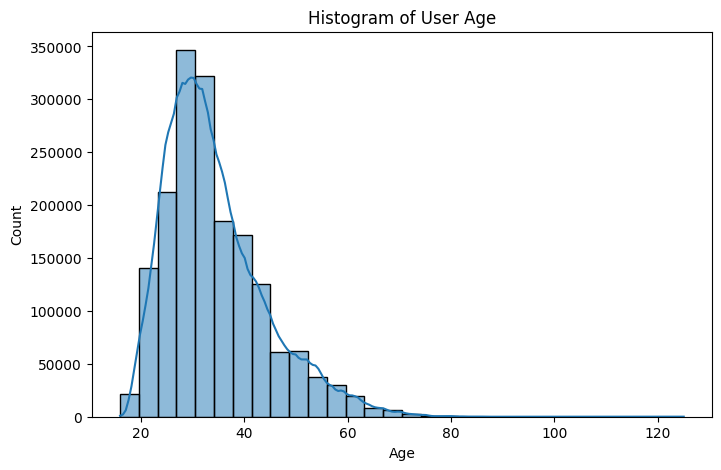

In [16]:
# Create a visualization of 'Edad_Usuario' distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Edad_Usuario'], bins=30, kde=True)
plt.title('Histogram of User Age')
plt.xlabel('Age')
plt.show()

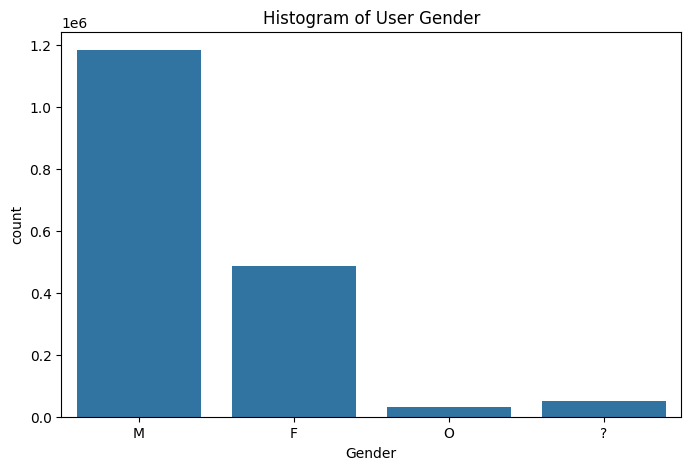

In [20]:
# Create a visualization of 'Genero_Usuario' distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df['Genero_Usuario'])
plt.title('Histogram of User Gender')
plt.xlabel('Gender')
plt.show()

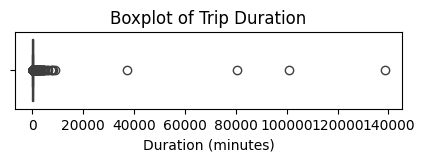

In [13]:
# Create a boxplot to visualize distribution of 'Duracion_Viaje'
plt.figure(figsize=(5,1))
sns.boxplot(x=df['Duracion_Viaje'])
plt.title('Boxplot of Trip Duration')
plt.xlabel('Duration (minutes)')
plt.show()


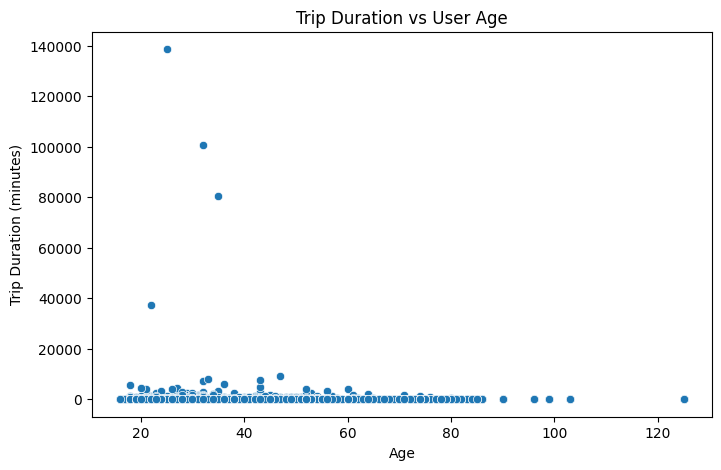

In [21]:
# Create a scatterplot of 'Duracion_Viaje' vs 'Edad_Usuario'
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Edad_Usuario'], y=df['Duracion_Viaje'])
plt.title('Trip Duration vs User Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (minutes)')
plt.show()


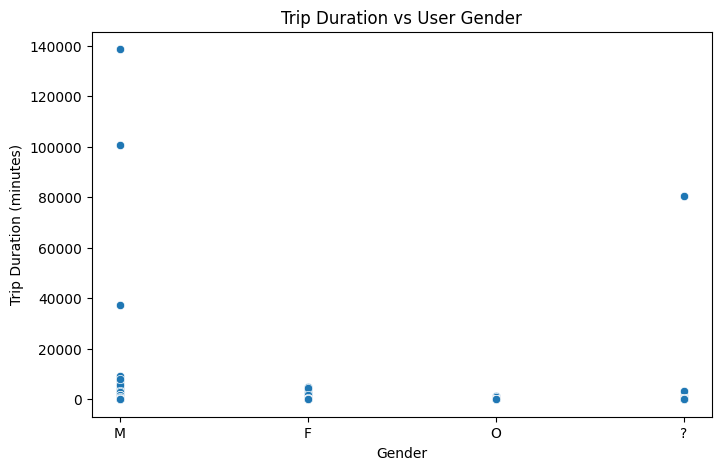

In [22]:
# Create a scatterplot of 'Genero_Usuario' vs 'Duracion_Viaje'
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Genero_Usuario'], y=df['Duracion_Viaje'])
plt.title('Trip Duration vs User Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (minutes)')
plt.show()

# Hypothesis testing

In [16]:
# Import packages for statistical analysis/hypothesis testing
from scipy import stats

H0 Null Hypothesis: There is no significant difference in trip durations based on user gender
HA Alternative Hypothesis: There is a significant difference in trip durations based on user gender

In [17]:
# Create a Hypothesis test to compare trip durations
male = df[df['Genero_Usuario'] == 'M']['Duracion_Viaje']
female = df[df['Genero_Usuario'] == 'F']['Duracion_Viaje']
t_stat, p_value = stats.ttest_ind(male, female)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.942199286000038, P-value: 0.052113147306554794


In [18]:
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("❌ We reject H₀: there is a significant difference in trip durations based on user gender.")
else:
    print("✅ H₀ is not rejected: there is not enough evidence to conclude that the trip durations differ based on user gender.")

✅ H₀ is not rejected: there is not enough evidence to conclude that the trip durations differ based on user gender.


# Examine correlations

In [19]:
# Code a correlation matrix to help determine most correlated variables
df.corr(numeric_only=True)

,Edad_Usuario,Bici,Duracion_Viaje
Edad_Usuario,1.000000,0.001282,-0.001228
Bici,0.001282,1.000000,-0.000290
Duracion_Viaje,-0.001228,-0.000290,1.000000


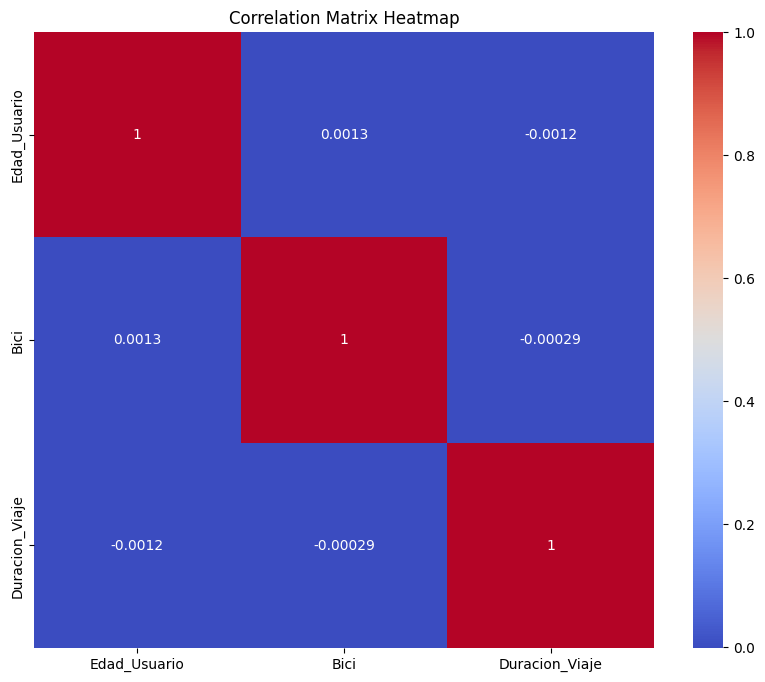

In [20]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Experiment Regression

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Selección de variables
X = df[['Edad_Usuario', 'Genero_Usuario']]
y = df['Duracion_Viaje']

# 2. Codificación de variable categórica
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[['Genero_Usuario']])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())

# 3. Concatenar con Edad_Usuario
X_final = pd.concat([X[['Edad_Usuario']].reset_index(drop=True), X_encoded_df], axis=1)

# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 5. Modelo de regresión
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 6. Evaluación
y_pred = reg_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 8.735489559831741
R²: 8.968444591528346e-05


# Experiment Clasification

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 1. Selección de variables
X = df[['Duracion_Viaje', 'Edad_Usuario']]
y = df['Genero_Usuario']

# 2. Codificación de variable objetivo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Modelo de clasificación
clf_model = LogisticRegression(max_iter=800)
clf_model.fit(X_train, y_train)

# 5. Evaluación
y_pred = clf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


c:\Users\ingfe\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ingfe\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ingfe\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

              precision    recall  f1-score   support

           ?       0.00      0.00      0.00     10232
           F       0.00      0.00      0.00     97648
           M       0.67      1.00      0.81    236496
           O       0.00      0.00      0.00      6479

    accuracy                           0.67    350855
   macro avg       0.17      0.25      0.20    350855
weighted avg       0.45      0.67      0.54    350855

